# Case study - 911 Calls
## Fire, Traffic and EMS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Assuming we are data scientist working with 911. What kind of data would you require
- Call logs
- Call volumes - Number of calls per day
- Duration of call
- How many employees and their call engagements

In [2]:
df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/911.csv")
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [9]:
df.tail(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
663512,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: FALL VICTIM,2020-07-29 15:33:09,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1
663513,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,NaN,Traffic: VEHICLE FIRE -,2020-07-29 15:34:11,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,1
663514,40.085847,-75.402226,VILLAGE DR & N GULPH RD; UPPER MERION; 2020-07...,19406.0,Traffic: VEHICLE FIRE -,2020-07-29 15:35:33,UPPER MERION,VILLAGE DR & N GULPH RD,1
663515,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,NaN,Traffic: VEHICLE FIRE -,2020-07-29 15:32:29,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,1
663516,40.066632,-75.143610,CHELSEA RD & EUSTON RD; CHELTENHAM; 2020-07-29...,19027.0,Fire: FIRE ALARM,2020-07-29 15:38:40,CHELTENHAM,CHELSEA RD & EUSTON RD,1
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1


In [3]:
df.shape

(663522, 9)

In [4]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


## Data Dictionary

- lat: latitude vĩ độ
- lng: Longtitude kinh độ
- desc : Descripstion of the Emergency Call
- zip : Zipcode
- title
- twp : TownShip
- addr: address
- e: Dummy variable
## First some basic questions :
- from where the calls the most
- which are top townships for call
- how many unique title
- what is the reason for most call

## 1. How mant calls per day per hour?


In [7]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 45.6+ MB


In [8]:
df['timeStamp'].dt.hour

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: timeStamp, Length: 663522, dtype: int32

In [10]:
df['timeStamp'].dt.date

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: timeStamp, Length: 663522, dtype: object

In [11]:
# Create columns hour and date

df['hour'] = df['timeStamp'].dt.hour
df['date'] = df['timeStamp'].dt.strftime("%Y-%m-%d")

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,2015-12-10


In [12]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'hour', 'date'],
      dtype='object')

In [14]:
# Let's group based on the date and hour

grouped_df = df.groupby(['date', 'hour'])

grouped_df.get_group(name = ("2015-12-12", 17))

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,date
746,40.256087,-75.633848,WILSON ST & N WASHINGTON ST; POTTSTOWN; Stati...,19464.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-12 17:00:57,POTTSTOWN,WILSON ST & N WASHINGTON ST,1,17,2015-12-12
747,40.372923,-75.485801,STONEHAVEN DR & WEXFORD DR; RED HILL; Station...,18076.0,EMS: ALTERED MENTAL STATUS,2015-12-12 17:05:51,RED HILL,STONEHAVEN DR & WEXFORD DR,1,17,2015-12-12
748,40.110910,-75.136087,ABINGTON AVE & CHARLES ST; ABINGTON; Station ...,19038.0,EMS: UNRESPONSIVE SUBJECT,2015-12-12 17:04:52,ABINGTON,ABINGTON AVE & CHARLES ST,1,17,2015-12-12
749,40.087299,-75.151532,W CHURCH RD & GREENWOOD AVE; CHELTENHAM; 2015-...,19095.0,Traffic: DISABLED VEHICLE -,2015-12-12 17:05:00,CHELTENHAM,W CHURCH RD & GREENWOOD AVE,1,17,2015-12-12
750,40.069832,-75.316295,SCHUYLKILL EXPY & MATSONFORD RD EXIT UNDERPASS...,NaN,Traffic: DISABLED VEHICLE -,2015-12-12 17:11:59,WEST CONSHOHOCKEN,SCHUYLKILL EXPY & MATSONFORD RD EXIT UNDERPASS,1,17,2015-12-12
751,40.310943,-75.318355,BROAD ST & N 3RD ST; SOUDERTON; 2015-12-12 @ 1...,18964.0,Traffic: DISABLED VEHICLE -,2015-12-12 17:13:22,SOUDERTON,BROAD ST & N 3RD ST,1,17,2015-12-12
752,40.237584,-75.252465,SASSAFRAS DR & HAWTHORNE DR; MONTGOMERY; Stat...,19454.0,EMS: RESPIRATORY EMERGENCY,2015-12-12 17:18:23,MONTGOMERY,SASSAFRAS DR & HAWTHORNE DR,1,17,2015-12-12
753,40.147650,-75.198632,KENYON DR & WALLACE DR; UPPER DUBLIN; 2015-12-...,19034.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-12 17:16:56,UPPER DUBLIN,KENYON DR & WALLACE DR,1,17,2015-12-12
754,40.229008,-75.387852,S HANOVER ST & E HOFFECKER RD; CHESTER COUNTY;...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-12 17:21:26,CHESTER COUNTY,S HANOVER ST & E HOFFECKER RD,1,17,2015-12-12
755,40.229008,-75.387852,HANOVER ST & TEMPLE RD; CHESTER COUNTY; 2015-1...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-12 17:21:26,CHESTER COUNTY,HANOVER ST & TEMPLE RD,1,17,2015-12-12


In [15]:
# Count

grouped_df['timeStamp'].count()

date        hour
2015-12-10  14       1
            15       1
            16       6
            17      16
            18      26
                    ..
2020-07-29  11      17
            12      15
            13      22
            14      16
            15      26
Name: timeStamp, Length: 40546, dtype: int64

In [16]:

grouped_df['timeStamp'].count().reset_index()

,date,hour,timeStamp
0,2015-12-10,14,1
1,2015-12-10,15,1
2,2015-12-10,16,6
3,2015-12-10,17,16
4,2015-12-10,18,26
...,...,...,...
40541,2020-07-29,11,17
40542,2020-07-29,12,15
40543,2020-07-29,13,22
40544,2020-07-29,14,16


In [17]:
calls = grouped_df['timeStamp'].count().reset_index()

calls.head()

,date,hour,timeStamp
0,2015-12-10,14,1
1,2015-12-10,15,1
2,2015-12-10,16,6
3,2015-12-10,17,16
4,2015-12-10,18,26


In [19]:
calls.columns = ["date", "hour", "calls"]

calls.head()

,date,hour,calls
0,2015-12-10,14,1
1,2015-12-10,15,1
2,2015-12-10,16,6
3,2015-12-10,17,16
4,2015-12-10,18,26


In [20]:
pd.pivot_table(data = calls,
               index = "date",
               columns = "hour",
               values = "calls")
               

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,6.0,16.0,26.0,20.0,15.0,11.0,10.0,8.0
2015-12-11,3.0,4.0,4.0,9.0,6.0,5.0,10.0,11.0,29.0,11.0,...,23.0,28.0,27.0,39.0,24.0,32.0,11.0,12.0,16.0,7.0
2015-12-12,7.0,5.0,5.0,11.0,5.0,11.0,3.0,14.0,5.0,12.0,...,20.0,28.0,30.0,22.0,24.0,37.0,9.0,29.0,21.0,19.0
2015-12-13,9.0,5.0,5.0,8.0,2.0,4.0,8.0,13.0,14.0,11.0,...,18.0,17.0,14.0,22.0,28.0,16.0,14.0,8.0,17.0,6.0
2015-12-14,4.0,11.0,4.0,3.0,4.0,10.0,15.0,27.0,25.0,21.0,...,16.0,28.0,33.0,31.0,38.0,22.0,20.0,19.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,16.0,8.0,2.0,8.0,3.0,6.0,5.0,7.0,14.0,14.0,...,19.0,23.0,28.0,18.0,15.0,13.0,10.0,12.0,10.0,9.0
2020-07-26,6.0,7.0,8.0,8.0,6.0,3.0,7.0,6.0,13.0,16.0,...,26.0,13.0,12.0,19.0,18.0,14.0,20.0,15.0,8.0,5.0
2020-07-27,11.0,7.0,4.0,3.0,4.0,10.0,8.0,14.0,10.0,14.0,...,20.0,20.0,19.0,15.0,15.0,10.0,35.0,13.0,8.0,8.0


In [22]:
report = pd.pivot_table(data = calls,
               index = "date",
               columns = "hour",
               values = "calls")
               

In [25]:
report.isnull().sum(axis = 0) # theo cột

hour
0      7
1      8
2     17
3     14
4     11
5     11
6      2
7      4
8      1
9      2
10     2
11     3
12     2
13     4
14     1
15     1
16     2
17     2
18     2
19     3
20     2
21     2
22     3
23     4
dtype: int64

In [26]:
report.fillna(0, inplace = True)
report.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,6.0,16.0,26.0,20.0,15.0,11.0,10.0,8.0
2015-12-11,3.0,4.0,4.0,9.0,6.0,5.0,10.0,11.0,29.0,11.0,...,23.0,28.0,27.0,39.0,24.0,32.0,11.0,12.0,16.0,7.0
2015-12-12,7.0,5.0,5.0,11.0,5.0,11.0,3.0,14.0,5.0,12.0,...,20.0,28.0,30.0,22.0,24.0,37.0,9.0,29.0,21.0,19.0
2015-12-13,9.0,5.0,5.0,8.0,2.0,4.0,8.0,13.0,14.0,11.0,...,18.0,17.0,14.0,22.0,28.0,16.0,14.0,8.0,17.0,6.0
2015-12-14,4.0,11.0,4.0,3.0,4.0,10.0,15.0,27.0,25.0,21.0,...,16.0,28.0,33.0,31.0,38.0,22.0,20.0,19.0,10.0,10.0


<Axes: xlabel='hour'>

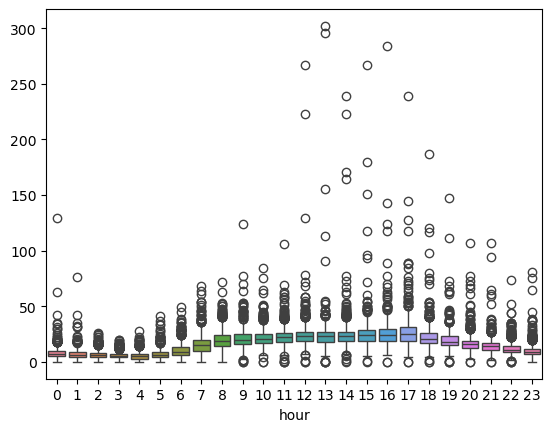

In [28]:
sns.boxplot(data = report)

In [30]:
(report!= 0).sum()

hour
0     1687
1     1686
2     1677
3     1680
4     1683
5     1683
6     1692
7     1690
8     1693
9     1692
10    1692
11    1691
12    1692
13    1690
14    1693
15    1693
16    1692
17    1692
18    1692
19    1691
20    1692
21    1692
22    1691
23    1690
dtype: int64

In [31]:
report.median()

hour
0      7.0
1      6.0
2      6.0
3      5.0
4      5.0
5      6.0
6      9.0
7     15.0
8     19.0
9     20.0
10    21.0
11    22.0
12    23.0
13    23.0
14    23.0
15    24.0
16    24.0
17    25.0
18    21.0
19    18.0
20    16.0
21    14.0
22    11.0
23     9.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

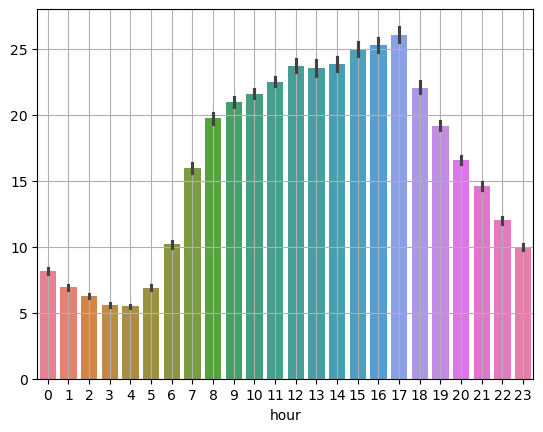

In [36]:
sns.barplot(report)
plt.grid()
plt.show

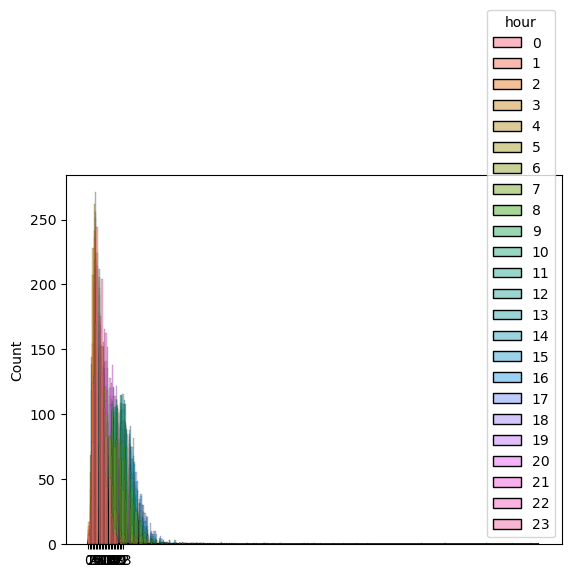

In [35]:
sns.histplot(data = report)
plt.xticks(ticks=range(0, 24), labels=[str(h) for h in range(0, 24)])
plt.show()


### Objective:
- You want to use the Poisson Distribution to estimate the probabilities of diffent numbers of emergency calls arriving in the next hour

In [37]:
report.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,6.0,16.0,26.0,20.0,15.0,11.0,10.0,8.0
2015-12-11,3.0,4.0,4.0,9.0,6.0,5.0,10.0,11.0,29.0,11.0,...,23.0,28.0,27.0,39.0,24.0,32.0,11.0,12.0,16.0,7.0
2015-12-12,7.0,5.0,5.0,11.0,5.0,11.0,3.0,14.0,5.0,12.0,...,20.0,28.0,30.0,22.0,24.0,37.0,9.0,29.0,21.0,19.0
2015-12-13,9.0,5.0,5.0,8.0,2.0,4.0,8.0,13.0,14.0,11.0,...,18.0,17.0,14.0,22.0,28.0,16.0,14.0,8.0,17.0,6.0
2015-12-14,4.0,11.0,4.0,3.0,4.0,10.0,15.0,27.0,25.0,21.0,...,16.0,28.0,33.0,31.0,38.0,22.0,20.0,19.0,10.0,10.0


In [38]:
report.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='hour')

In [41]:
h = int(input("Enter the Hour:"))

while h < 0 or h > 23:
    print("Incorrect Input. Note that the input should be an integer in the range 0 to 23.")
    h = int(input("Enter the Hour:"))
else:
    print("Input Accepted")

Enter the Hour: 17


Input Accepted


In [42]:
report[h]

date
2015-12-10    16.0
2015-12-11    39.0
2015-12-12    22.0
2015-12-13    22.0
2015-12-14    31.0
              ... 
2020-07-25    18.0
2020-07-26    19.0
2020-07-27    15.0
2020-07-28    16.0
2020-07-29     0.0
Name: 17, Length: 1694, dtype: float64

In [43]:
report[report[h] == 118]

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2017-06-21,13.0,5.0,8.0,3.0,3.0,13.0,23.0,13.0,28.0,19.0,...,22.0,13.0,124.0,118.0,37.0,44.0,28.0,19.0,18.0,12.0


In [45]:
report[h].value_counts()

17
25.0     86
26.0     85
22.0     84
30.0     82
21.0     82
         ..
59.0      1
57.0      1
118.0     1
64.0      1
51.0      1
Name: count, Length: 68, dtype: int64

<Axes: xlabel='17'>

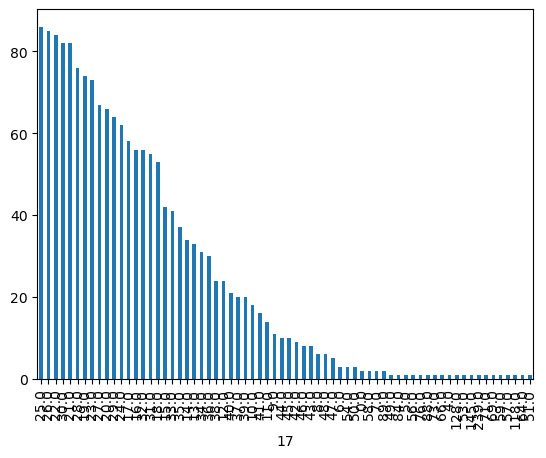

In [46]:
report[h].value_counts().plot(kind = 'bar')

<Axes: xlabel='17'>

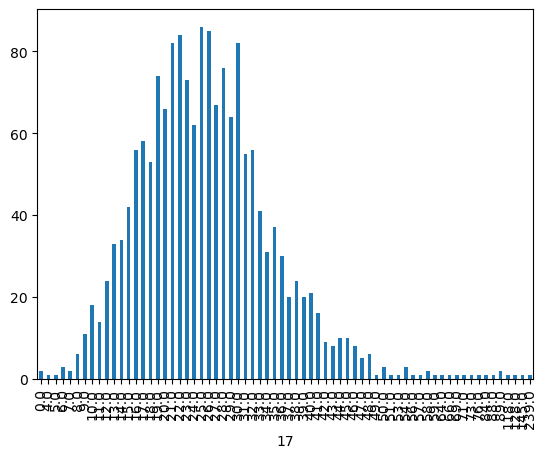

In [47]:
report[h].value_counts().sort_index().plot(kind="bar")

### Observation : Look like a Poisson Distribution (discrete Distribution, Right skewed0


In [49]:
# Define the average arrival rate(lambda) for the Poisson Distribution
lambda_ = report[h].median()

# define the possible number of emergency calls
min_th = int(lambda_)-10
max_th = int(lambda_)+10

# create range 
num_calls = range(min_th, max_th)

est = []

for num in num_calls:
    if num >= 0:
        est.append([num, round(stats.poisson.pmf(num, mu = lambda_), 4)])

est_df = pd.DataFrame(est, columns = ["n_calls", "prob"])
est_df

,n_calls,prob
0,15,0.0099
1,16,0.0155
2,17,0.0227
3,18,0.0316
4,19,0.0415
5,20,0.0519
6,21,0.0618
7,22,0.0702
8,23,0.0763
9,24,0.0795


# Preparing the Script for Data app


In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,2015-12-10


In [52]:
map_data = df[['lat', 'lng']]
map_data

,lat,lng
0,40.297876,-75.581294
1,40.258061,-75.264680
2,40.121182,-75.351975
3,40.116153,-75.343513
4,40.251492,-75.603350
...,...,...
663517,40.157956,-75.348060
663518,40.136306,-75.428697
663519,40.013779,-75.300835
663520,40.121603,-75.351437


In [53]:
map_data.columns

Index(['lat', 'lng'], dtype='object')

In [54]:
map_data.columns = ['lat', 'lon']

In [55]:
map_data.to_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/map_data_update.csv", index = False);

In [56]:
report.to_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/day_wise_hourly_report.csv");

In [59]:
def plotter(report, hour):
    fig, ax = plt.subplots(figsize = (20, 8))

    ax.set_title("Distribution of calls")
    sns.countplot(data=report, x = hour, ax = ax)
    ax.set_xlabel(f"Number of Calls at {hour} hour")
    ax.set_ylabel("Frequency")

    plt.xticks(rotation=45)
    
    plt.show()
def estimation(report, hour):
    lambda_ = report[hour].median()

    min_th = int(lambda_) - 10
    max_th = int(lambda_) + 10

    num_calls = range(min_th, max_th)

    est = []
    for num in num_calls:
        if num >= 0:
            est.append([num, round(stats.poisson.pmf(num, mu = lambda_), 4)])

    est_df = pd.DataFrame(est, columns = ["n_calls", "prob"])
    return est_df

In [62]:

hour = int(input("Enter the Hour:"))

while hour < 0 or hour > 23:
    print("Incorrect Input. Note that the input should be an integer in the range 0 to 23.")
    hour = int(input("Enter the Hour:"))
else:
    print("Input Accepted")
report_df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/day_wise_hourly_report.csv")
report_df.set_index('date', inplace=True) # set index để biến cột đó thanfnh index luôn

report_df.head()

Enter the Hour: 17


Input Accepted


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,6.0,16.0,26.0,20.0,15.0,11.0,10.0,8.0
2015-12-11,3.0,4.0,4.0,9.0,6.0,5.0,10.0,11.0,29.0,11.0,...,23.0,28.0,27.0,39.0,24.0,32.0,11.0,12.0,16.0,7.0
2015-12-12,7.0,5.0,5.0,11.0,5.0,11.0,3.0,14.0,5.0,12.0,...,20.0,28.0,30.0,22.0,24.0,37.0,9.0,29.0,21.0,19.0
2015-12-13,9.0,5.0,5.0,8.0,2.0,4.0,8.0,13.0,14.0,11.0,...,18.0,17.0,14.0,22.0,28.0,16.0,14.0,8.0,17.0,6.0
2015-12-14,4.0,11.0,4.0,3.0,4.0,10.0,15.0,27.0,25.0,21.0,...,16.0,28.0,33.0,31.0,38.0,22.0,20.0,19.0,10.0,10.0


<Axes: >

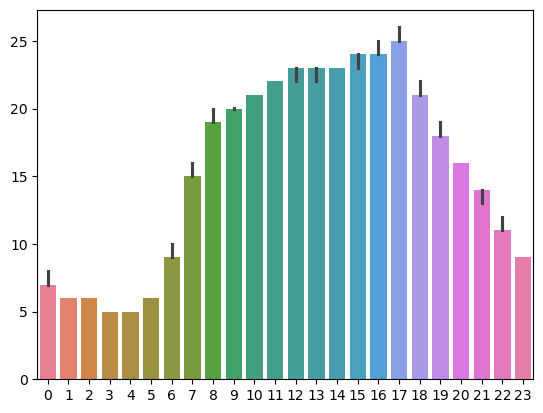

In [63]:
sns.barplot(report_df, estimator=np.median)

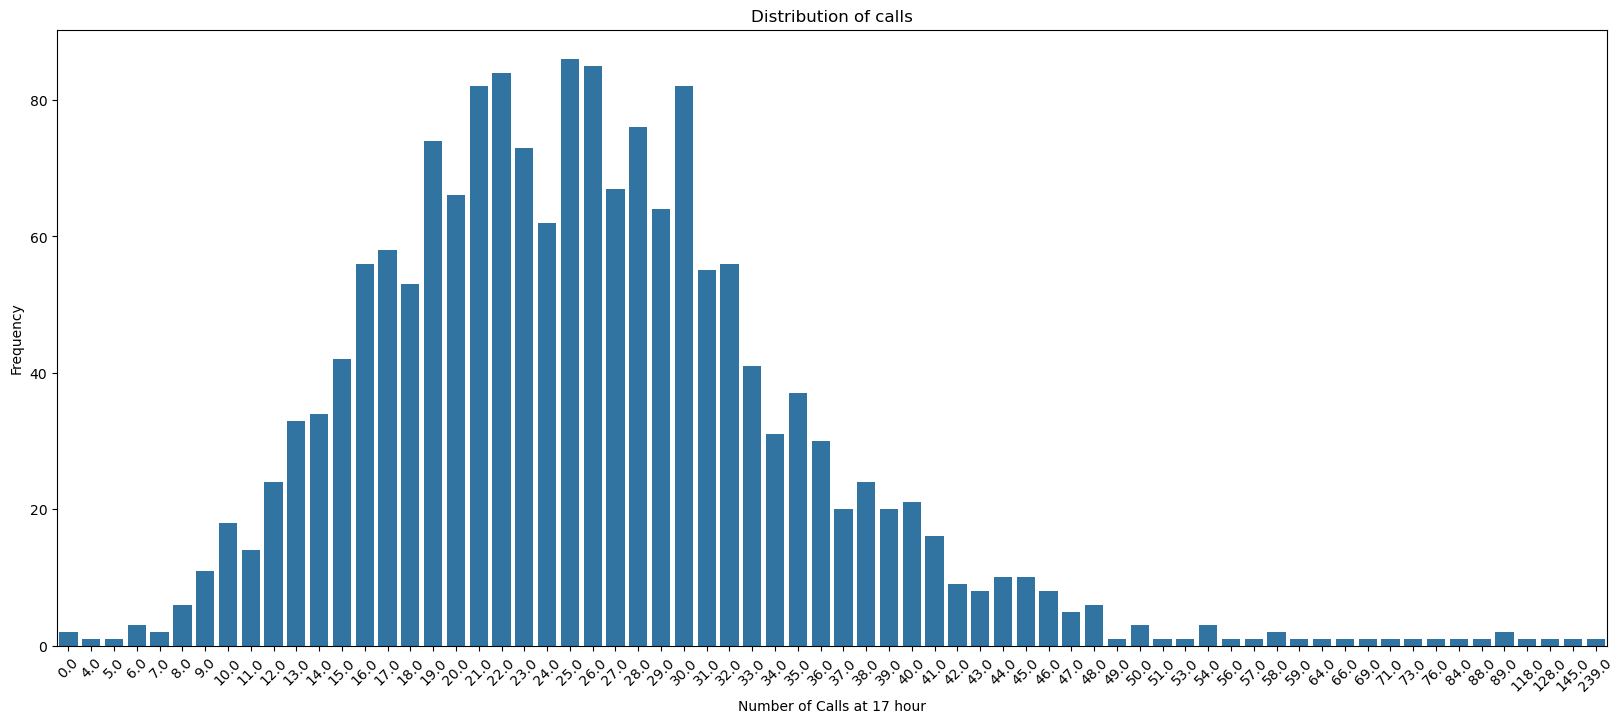

In [65]:
plotter(report_df, str(hour))

In [66]:
estimation(report_df, str(hour))

,n_calls,prob
0,15,0.0099
1,16,0.0155
2,17,0.0227
3,18,0.0316
4,19,0.0415
5,20,0.0519
6,21,0.0618
7,22,0.0702
8,23,0.0763
9,24,0.0795
